In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [6]:
# Load the dataset
data = pd.read_csv(r"C:\Users\sunan\Downloads\guilds.csv")

In [7]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Fae_Dust_Reserve                     228327 non-null  float64
 1   Physical_Stamina                     228269 non-null  float64
 2   Mystical_Index                       228480 non-null  float64
 3   Healer_consultation_Presence         228348 non-null  object 
 4   Elixir_veggies_consumption_Presence  228110 non-null  object 
 5   Mystic_Energy_Level                  228177 non-null  float64
 6   Bolt_of_doom_Presence                228146 non-null  object 
 7   Age_of_Wisdom                        228309 non-null  float64
 8   High_willingness_Presence            228370 non-null  object 
 9   Defense_spell_difficulty_Presence    228385 non-null  object 
 10  Doc_availability_challenge_Presence  228233 non-null  object 
 11 

In [8]:
# Verify initial columns
print("\nColumns in dataset:")
print(data.columns)


Columns in dataset:
Index(['Fae_Dust_Reserve', 'Physical_Stamina', 'Mystical_Index',
       'Healer_consultation_Presence', 'Elixir_veggies_consumption_Presence',
       'Mystic_Energy_Level', 'Bolt_of_doom_Presence', 'Age_of_Wisdom',
       'High_willingness_Presence', 'Defense_spell_difficulty_Presence',
       'Doc_availability_challenge_Presence', 'Mental_Wizardry',
       'Potion_Power_Level', 'Dexterity_check_Presence',
       'Gold_Pouches_Per_Year', 'Wizardry_Skill', 'Spell_Mastering_Days',
       'Level_of_Academic_Wisdom', 'General_Health_Condition',
       'Fruits_of_eden_consumption_Presence',
       'Knight_physical_training_Presence', 'Royal_family_pressure_Presence',
       'Dragon_Sight_Sharpness', 'Guild_Membership', 'Enchanted_Coin_Count',
       'Celestial_Alignment', 'Knightly_Valor',
       'Heavy_elixir_consumption_Presence', 'Stigmata_of_the_cursed_Presence',
       'Dragon_status_Presence', 'Rune_Power'],
      dtype='object')


C:\Users\sunan\AppData\Local\Temp\ipykernel_8104\3963450774.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_dist.index, y=target_dist.values, palette="muted")


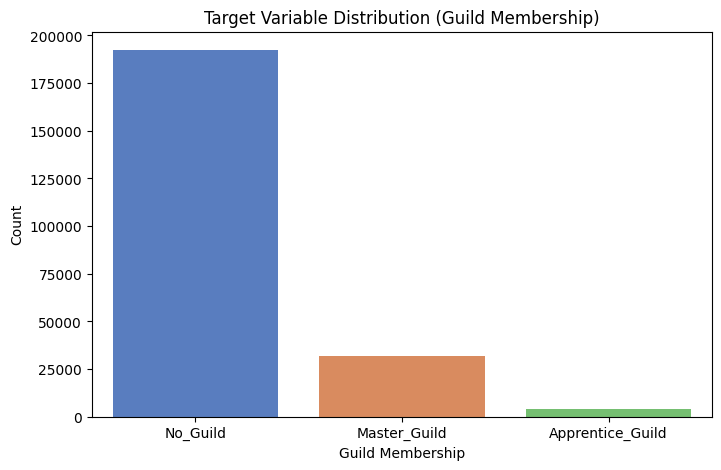

In [9]:
# EDA: Target variable distribution
if 'Guild_Membership' in data.columns:
    target_dist = data['Guild_Membership'].value_counts()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=target_dist.index, y=target_dist.values, palette="muted")
    plt.title("Target Variable Distribution (Guild Membership)")
    plt.xlabel("Guild Membership")
    plt.ylabel("Count")
    plt.show()

In [10]:
# Verify the target variable presence
if 'Guild_Membership' not in data.columns:
    raise KeyError("The 'Guild_Membership' column is missing in the dataset.")

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Fae_Dust_Reserve                       25353
Physical_Stamina                       25411
Mystical_Index                         25200
Healer_consultation_Presence           25332
Elixir_veggies_consumption_Presence    25570
Mystic_Energy_Level                    25503
Bolt_of_doom_Presence                  25534
Age_of_Wisdom                          25371
High_willingness_Presence              25310
Defense_spell_difficulty_Presence      25295
Doc_availability_challenge_Presence    25447
Mental_Wizardry                        25414
Potion_Power_Level                     25439
Dexterity_check_Presence               25043
Gold_Pouches_Per_Year                  25313
Wizardry_Skill                         25266
Spell_Mastering_Days                   25204
Level_of_Academic_Wisdom               25560
General_Health_Condition               25569
Fruits_of_eden_consumption_Presence    25229
Knight_physical_training_Presence      25459
Royal_family_pressure_Presence        

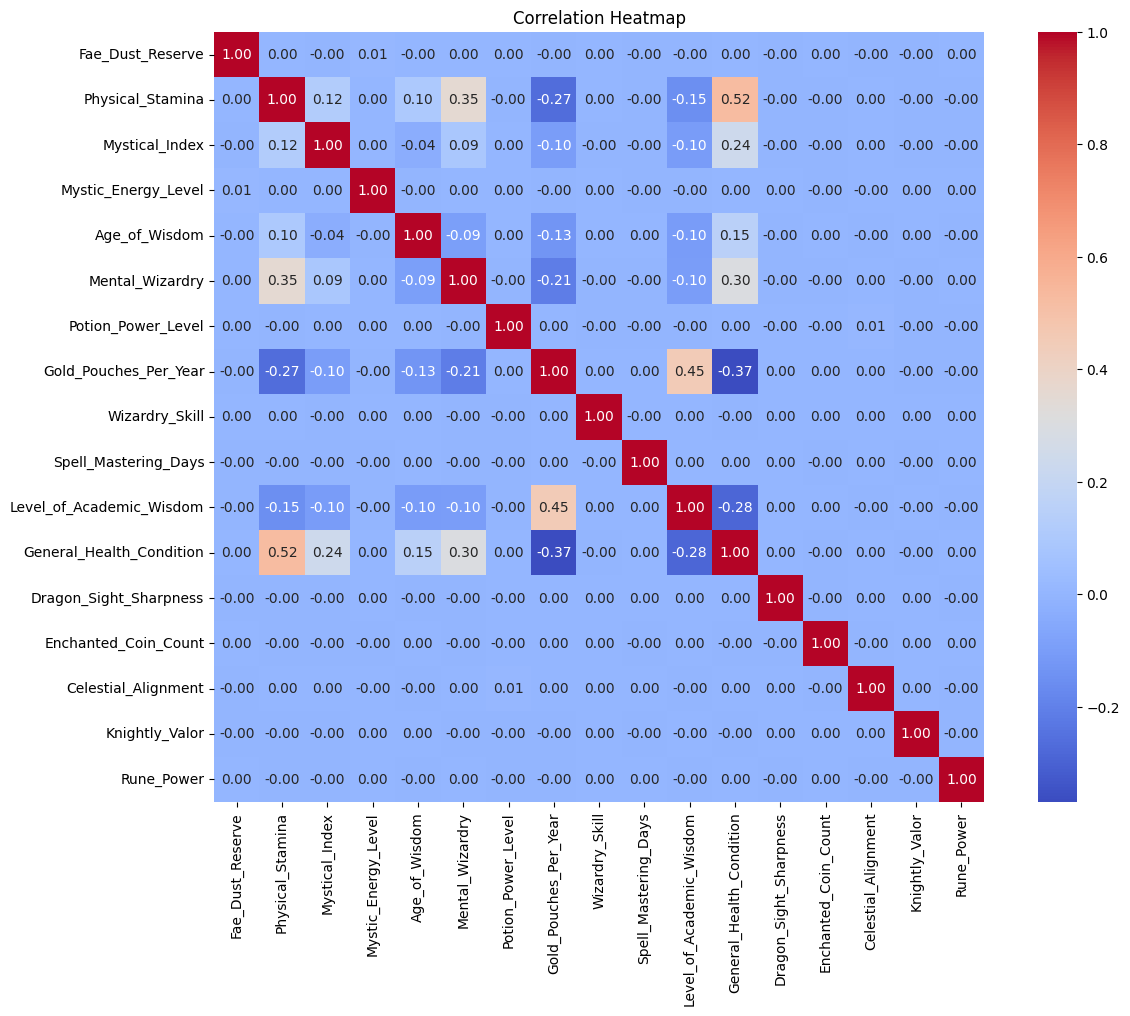

In [11]:
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Data Preprocessing
features = [
    "Fae_Dust_Reserve", "Physical_Stamina", "Mystical_Index",
    "Healer_consultation_Presence", "Elixir_veggies_consumption_Presence",
    "Mystic_Energy_Level", "Age_of_Wisdom", "Mental_Wizardry",
    "Gold_Pouches_Per_Year", "Wizardry_Skill", "Spell_Mastering_Days",
    "Level_of_Academic_Wisdom", "General_Health_Condition",
    "Dragon_Sight_Sharpness", "Rune_Power", "Guild_Membership"
]

data = data[features]

In [13]:
# Handle missing values
numeric_features = data.select_dtypes(include=['float', 'int']).columns
categorical_features = data.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

In [14]:

# Impute numeric features
data[numeric_features] = num_imputer.fit_transform(data[numeric_features])

# Impute categorical features
for col in categorical_features:
    data[col] = cat_imputer.fit_transform(data[[col]]).ravel()  # Fix for 1D output

# Verify after imputation
print("\nColumns after imputation:")
print(data.info())


Columns after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Fae_Dust_Reserve                     253680 non-null  float64
 1   Physical_Stamina                     253680 non-null  float64
 2   Mystical_Index                       253680 non-null  float64
 3   Healer_consultation_Presence         253680 non-null  object 
 4   Elixir_veggies_consumption_Presence  253680 non-null  object 
 5   Mystic_Energy_Level                  253680 non-null  float64
 6   Age_of_Wisdom                        253680 non-null  float64
 7   Mental_Wizardry                      253680 non-null  float64
 8   Gold_Pouches_Per_Year                253680 non-null  float64
 9   Wizardry_Skill                       253680 non-null  float64
 10  Spell_Mastering_Days                 253680 non-null 

In [15]:
# Define features and target variable
target_column = "Guild_Membership"

if target_column not in data.columns:
    raise KeyError(f"'{target_column}' column is missing in the dataset.")

# Ensure the target variable is excluded from categorical features
categorical_features = data.select_dtypes(include=['object']).columns.drop(target_column)

# One-hot encode categorical variables
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cats = pd.DataFrame(
    encoder.fit_transform(data[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features)
)

In [16]:

# Concatenate encoded variables with the dataset
data = pd.concat([data.drop(columns=categorical_features), encoded_cats], axis=1)

In [17]:
# Ensure the target variable is preserved
if target_column not in data.columns:
    raise KeyError(f"'{target_column}' column is missing after encoding.")

# Encode target variable
label_encoder = LabelEncoder()
data[target_column] = label_encoder.fit_transform(data[target_column])

In [18]:
# Define features and target variable for modeling
X = data.drop(columns=[target_column])
y = data[target_column]


In [19]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train Models
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)



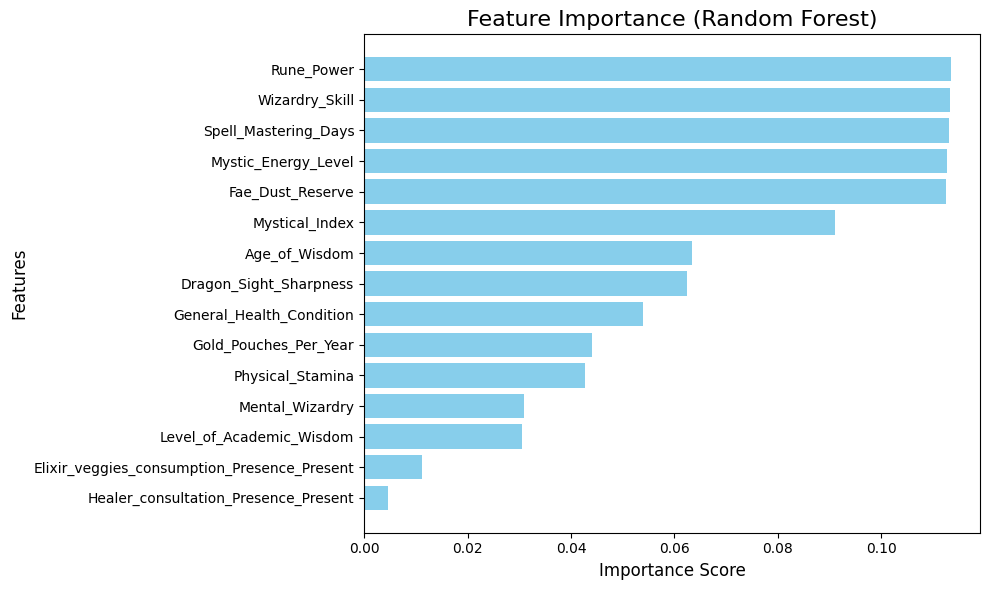

                     Feature  Importance
12                Rune_Power    0.113384
7             Wizardry_Skill    0.113289
8       Spell_Mastering_Days    0.113136
3        Mystic_Energy_Level    0.112714
0           Fae_Dust_Reserve    0.112548
2             Mystical_Index    0.090973
4              Age_of_Wisdom    0.063445
11    Dragon_Sight_Sharpness    0.062495
10  General_Health_Condition    0.053844
6      Gold_Pouches_Per_Year    0.044107


In [21]:
# Get feature importance
importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()

plt.show()

# Display the feature importance DataFrame
print(feature_importance_df.head(10))  # Show top 10 important features

In [22]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)



In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [ ]:
# Step 6: Evaluate Models
print("\nModel Performance:")
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


Model Performance:
Random Forest Accuracy: 0.8578327026174708
AdaBoost Accuracy: 0.8574582150741091
Gradient Boosting Accuracy: 0.8586605171870072


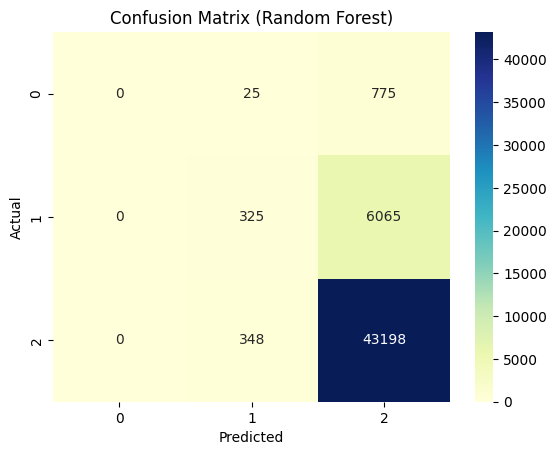

In [ ]:
# Step 7: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define a smaller parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
print("Tuning Random Forest...")
random_search_rf.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Accuracy for Random Forest:", random_search_rf.best_score_)


Tuning Random Forest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  32.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  32.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  33.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  42.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  42.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  42.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  39.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  40.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  40.8s
[CV] END 